# Cell type annotations

Sample description:
- Aplastic anemia
- follow up
- BM blasts = 0 %

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')





Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')


In [3]:
#select sample

adata=adata[adata.obs['eg_code'] == 'EG36']

In [4]:
adata1=adata.copy()

In [5]:
#all CLR data

adata_clr= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_prot_clr (1).h5ad')

In [6]:
adata_clr1=adata_clr.copy()

In [7]:
#selecting sample
adata_clr = adata_clr[adata_clr.obs.EG_code == 'EG36']

In [8]:
adata_clr

View of AnnData object with n_obs × n_vars = 2455 × 33
    obs: 'nCount_RNA', 'nFeature_RNA', 'bc', 'propmt', 'rna_size', 'ngene', 'prot_size', 'predicted.id', 'hashMax', 'adtMax', 'nHashPos', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'EG_code', 'Donor', 'prediction.score.CD14..monocyte.1', 'prediction.score.CD14..monocyte.2', 'prediction.score.NK', 'prediction.score.CD4..T.1', 'prediction.score.NK.T.1', 'prediction.score.NK.T.2', 'prediction.score.CD4..T.3', 'prediction.score.Conventional.dendritic.cell', 'prediction.score.7_immatureB', 'prediction.score.Late.erythoid.precursor.2', 'prediction.score.Early.erythoid.precursor', 'prediction.score.max', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'leiden_r1', 'T.CD4.Naive_score', 'T.CD4.TE_score', 'Tregs_score', 'Tfh_score', 'Th1_score', 'Th1.Th17_score', 'Th17_score', 'Th2_score', 'T.CD8.Naive_score', 'T.CD8.CM_score', 'T.CD8.EM_score', 'T.CD8.TE_score', 'T.gd.Vd2_s

In [9]:
adata1

AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [10]:
adata_clr.obs.index

Index(['AAACCTGAGCTGAACG-1', 'AAACCTGAGGTGGGTT-1', 'AAACCTGGTATATCCG-1',
       'AAACCTGGTCACACGC-1', 'AAACCTGGTCCAGTGC-1', 'AAACCTGTCACGAAGG-1',
       'AAACCTGTCTCCGGTT-1', 'AAACGGGAGGCCCTCA-1', 'AAACGGGAGGGTATCG-1',
       'AAACGGGCAATGGTCT-1',
       ...
       'TTTGGTTTCACGCGGT-1', 'TTTGGTTTCCCACTTG-1', 'TTTGGTTTCTGTCAAG-1',
       'TTTGTCAAGTCGTTTG-1', 'TTTGTCACACACTGCG-1', 'TTTGTCAGTCGCGTGT-1',
       'TTTGTCAGTGCGATAG-1', 'TTTGTCATCAGTACGT-1', 'TTTGTCATCGCCTGAG-1',
       'TTTGTCATCTACCAGA-1'],
      dtype='object', length=2455)

In [11]:
adata1.obs.index

Index(['AAACCTGAGCTGAACG-1-107', 'AAACCTGAGGTGGGTT-1-107',
       'AAACCTGGTATATCCG-1-107', 'AAACCTGGTCACACGC-1-107',
       'AAACCTGGTCCAGTGC-1-107', 'AAACCTGTCACGAAGG-1-107',
       'AAACCTGTCTCCGGTT-1-107', 'AAACGGGAGGCCCTCA-1-107',
       'AAACGGGAGGGTATCG-1-107', 'AAACGGGCACACATGT-1-107',
       ...
       'TTTGGTTGTGATGATA-1-107', 'TTTGGTTTCACGCGGT-1-107',
       'TTTGGTTTCCCACTTG-1-107', 'TTTGGTTTCTGTCAAG-1-107',
       'TTTGTCAAGTCGTTTG-1-107', 'TTTGTCACACACTGCG-1-107',
       'TTTGTCAGTCGCGTGT-1-107', 'TTTGTCATCAGTACGT-1-107',
       'TTTGTCATCGCCTGAG-1-107', 'TTTGTCATCTACCAGA-1-107'],
      dtype='object', length=2169)

In [12]:
def remove_tail(x):
    return x[:-4]
adata1.obs.index = pd.Index(pd.Series(adata1.obs.index).apply(remove_tail))

In [13]:
selector = adata_clr.obs.index.isin(adata1.obs.index)

In [14]:
selected_df = adata_clr.to_df()[selector]

In [15]:
adata1.obsm['protein_expression_clr'] = selected_df

In [17]:
adata1

AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr'
    obsp: 'connectivities', 'distances'

In [18]:
adata1.var_names

Index(['FAM41C', 'NOC2L', 'ISG15', 'C1orf159', 'SDF4', 'B3GALT6', 'UBE2J2',
       'ACAP3', 'PUSL1', 'AURKAIP1',
       ...
       'IKBKG', 'GAB3', 'DKC1', 'MPP1', 'F8A1', 'FUNDC2', 'BRCC3', 'VBP1',
       'TMLHE', 'VAMP7'],
      dtype='object', length=8051)

In [19]:
#Define marker genes

is_nk= ["CD3E","GZMB", "NKG7"] 
nk_cd56_bright = ["MYC", "BACH2"]
nk_cd56_dim = ["PRDM1", "ZEB2"]
nk_adaptive = ["KLF2"]

nk_mark= is_nk + nk_cd56_bright + nk_cd56_dim + nk_adaptive

nk_mark

['CD3E', 'GZMB', 'NKG7', 'MYC', 'BACH2', 'PRDM1', 'ZEB2', 'KLF2']

In [41]:
sc.settings.set_figure_params(dpi=150)

## All cell types

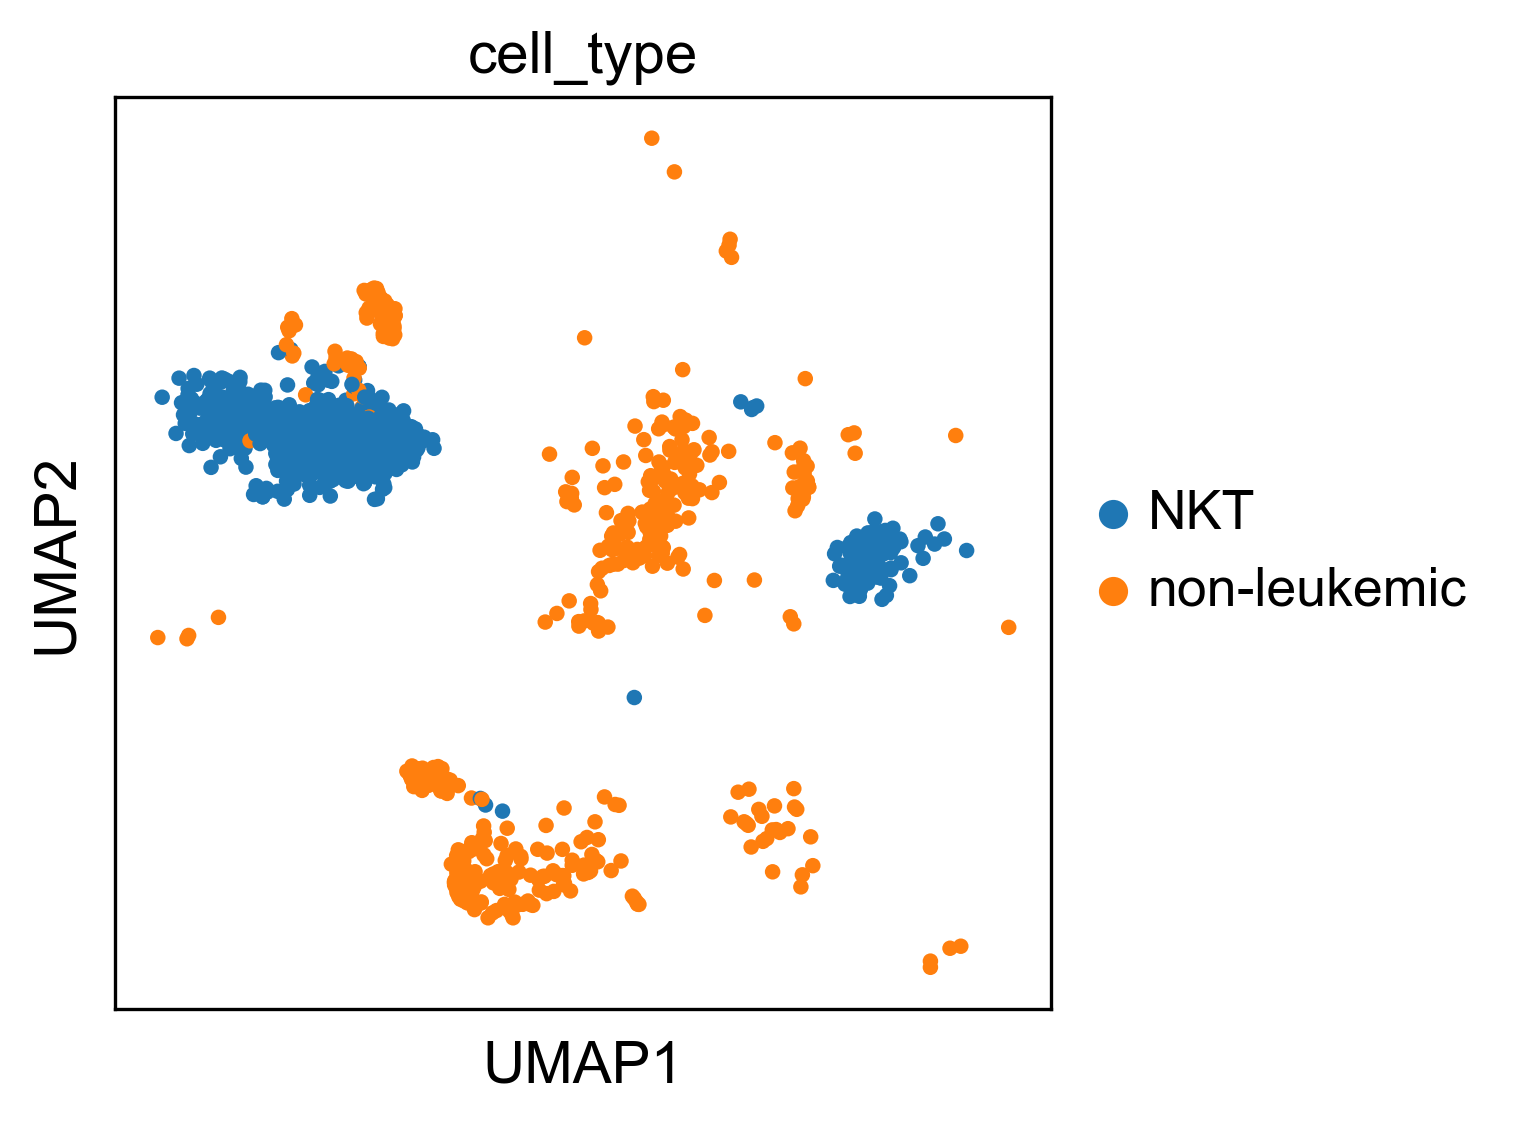

In [53]:
sc.pl.umap(adata1, color = ['leiden'], color_map = 'viridis', ncols = 3)

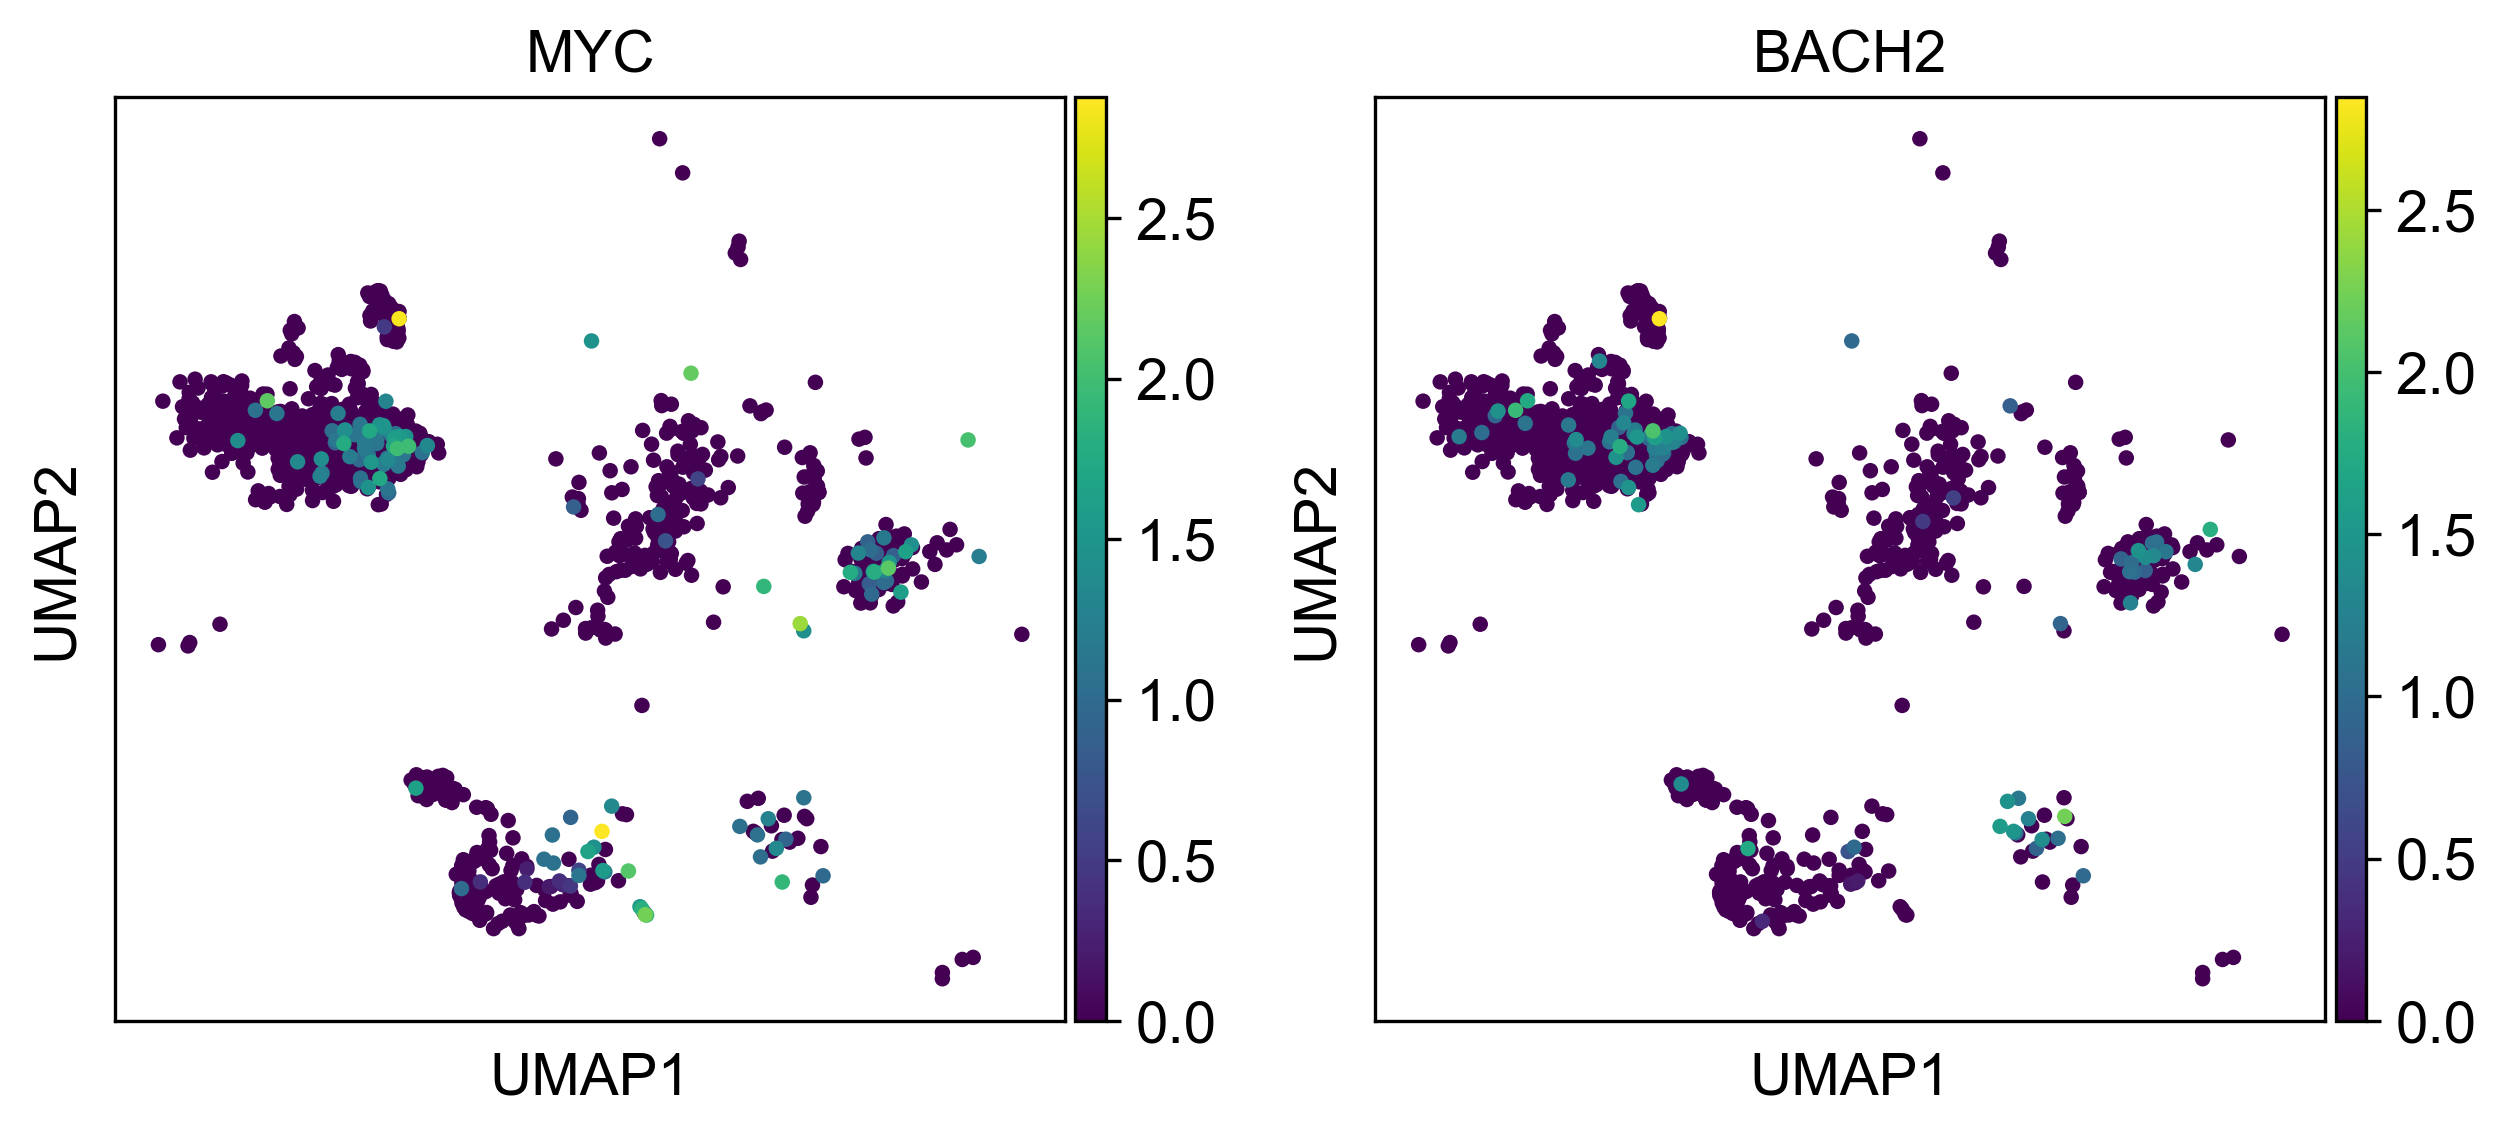

In [43]:
sc.pl.umap(adata1, color = nk_cd56_bright, color_map = 'viridis', ncols = 3)

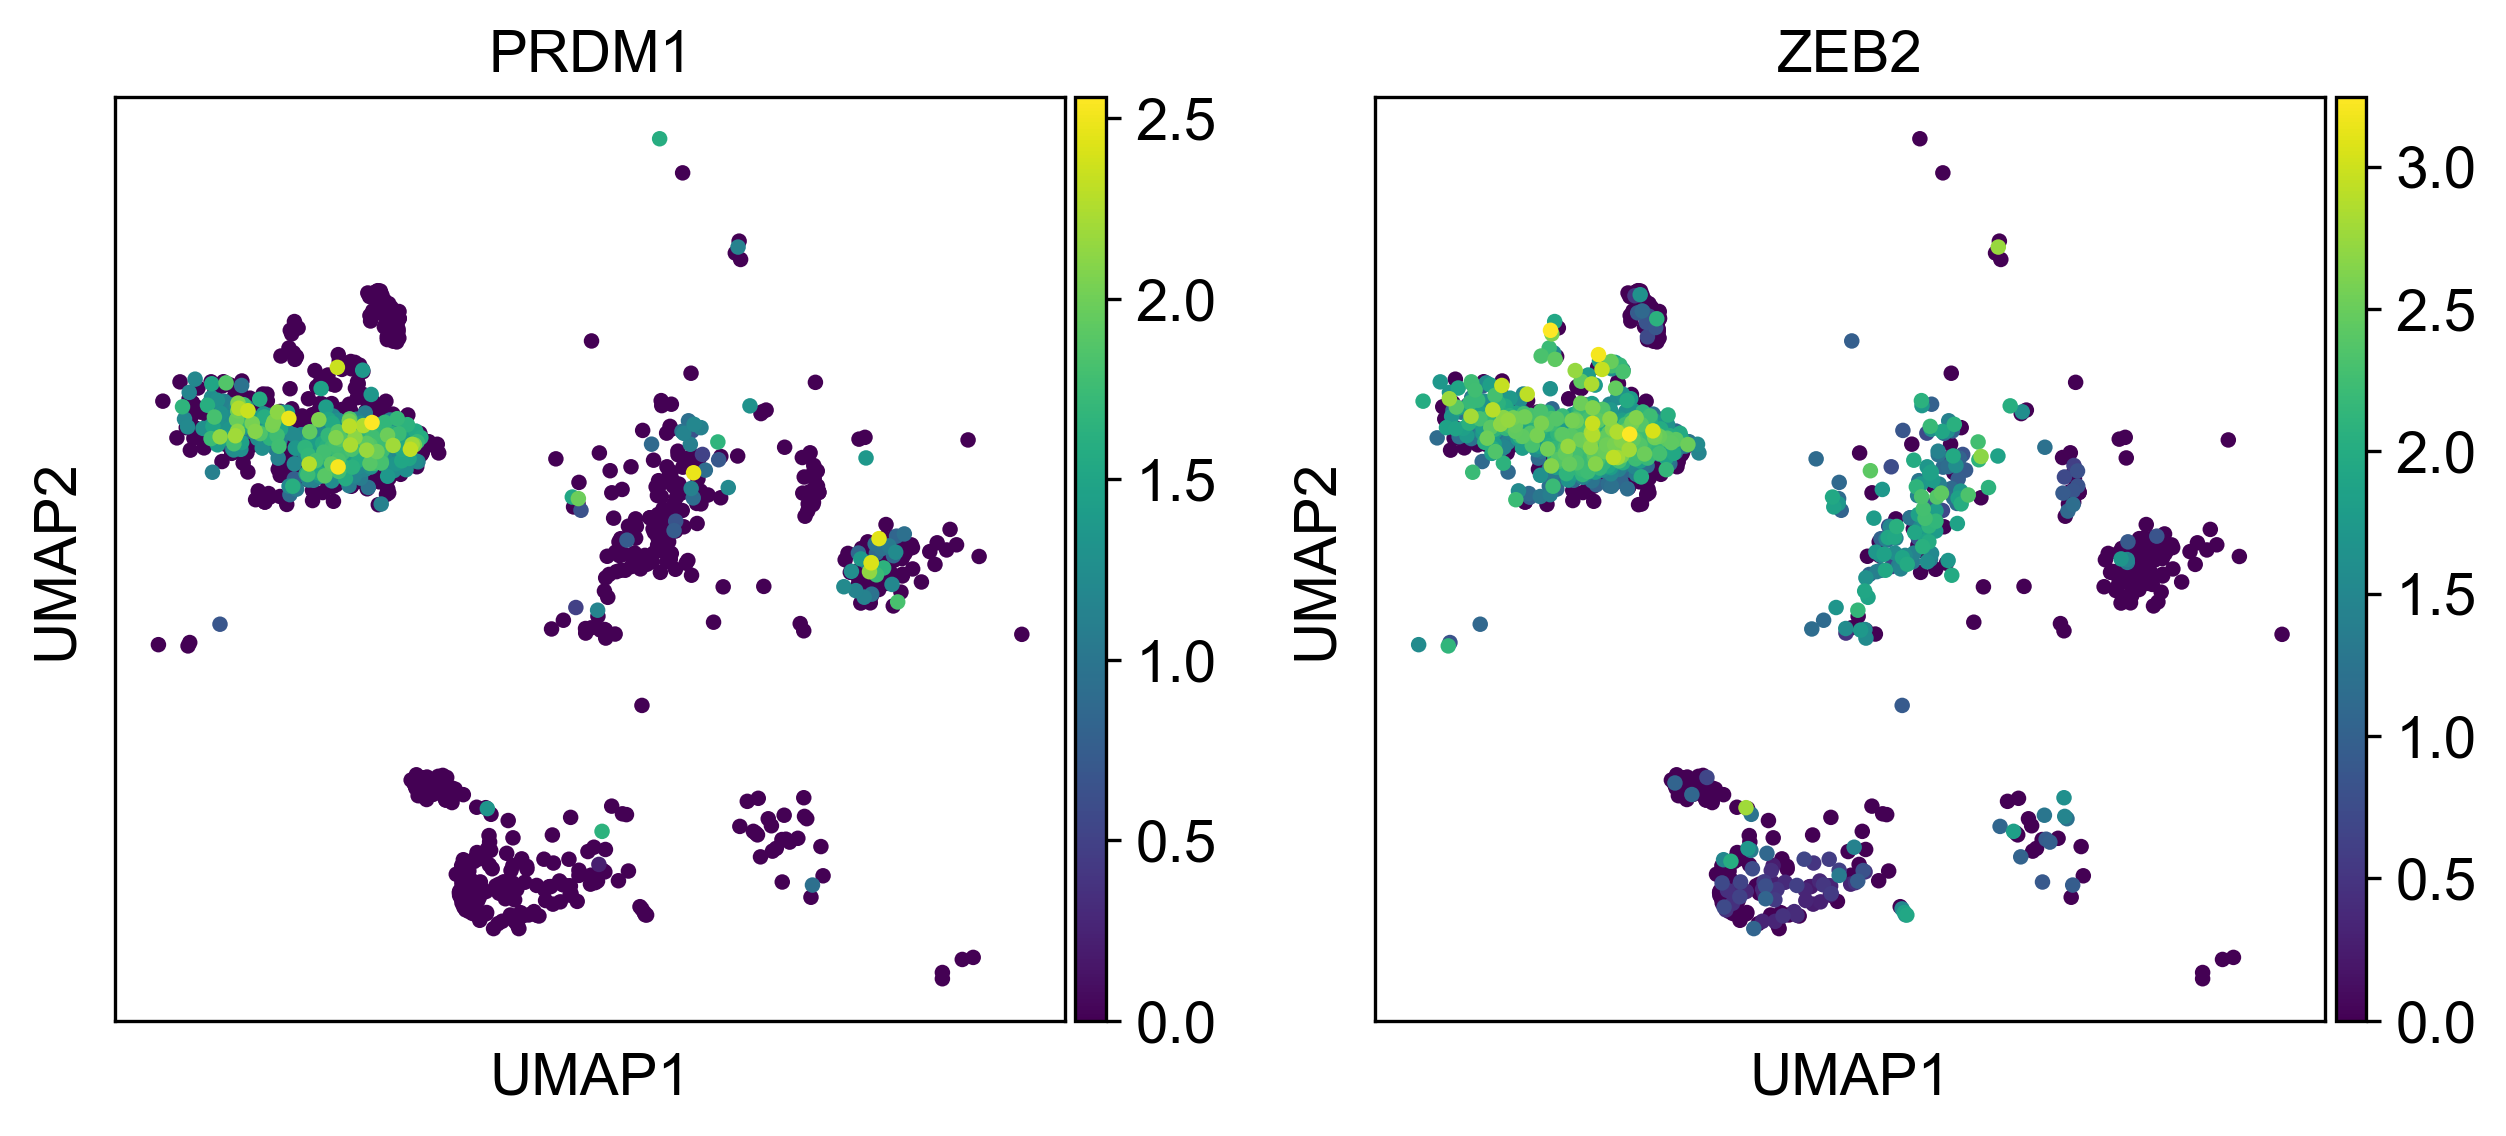

In [44]:
sc.pl.umap(adata1, color = nk_cd56_dim, color_map = 'viridis', ncols = 3)

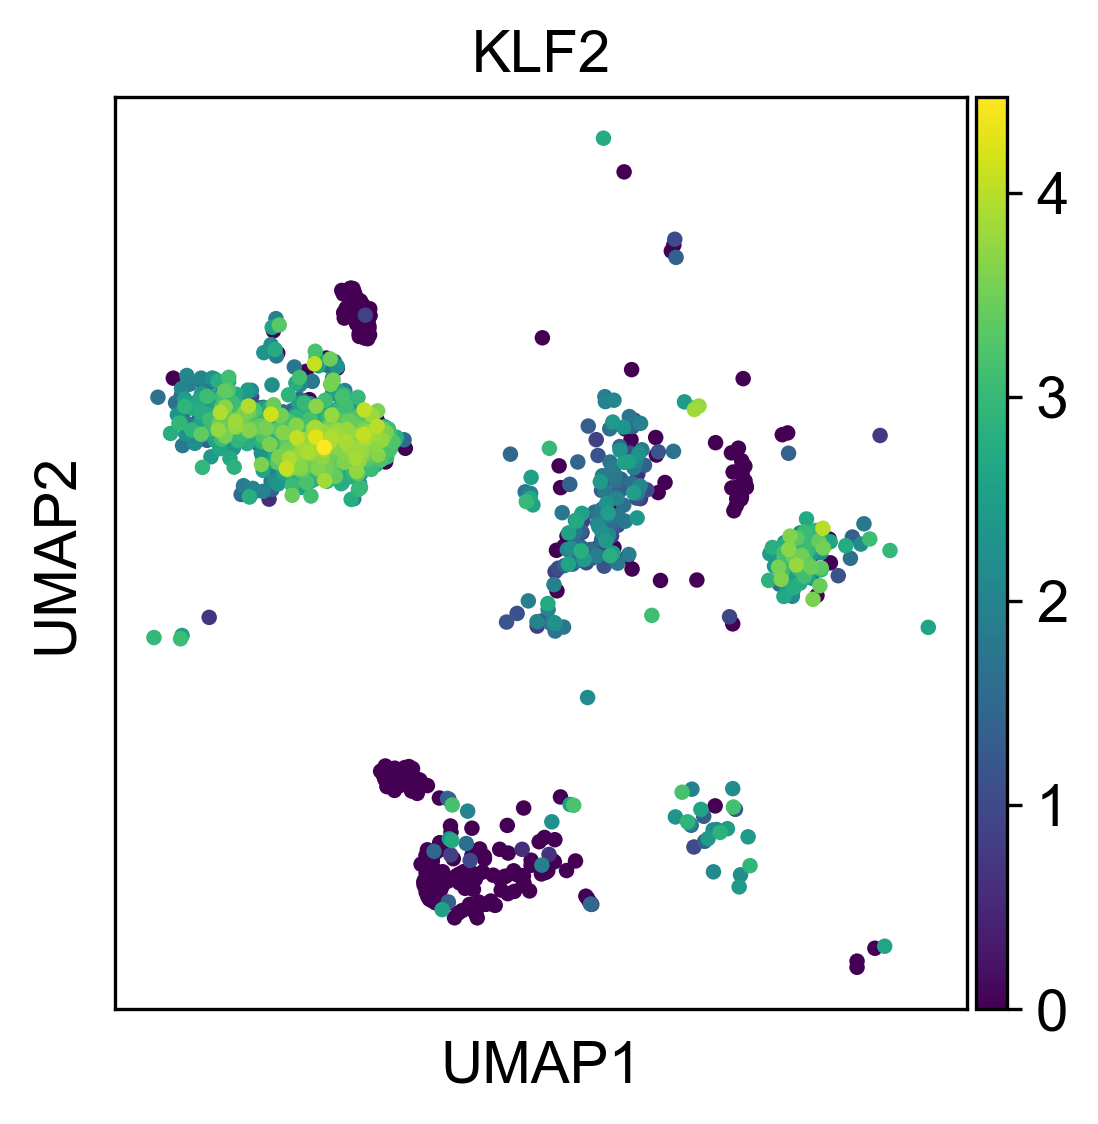

In [45]:
sc.pl.umap(adata1, color = nk_adaptive, color_map = 'viridis', ncols = 3)

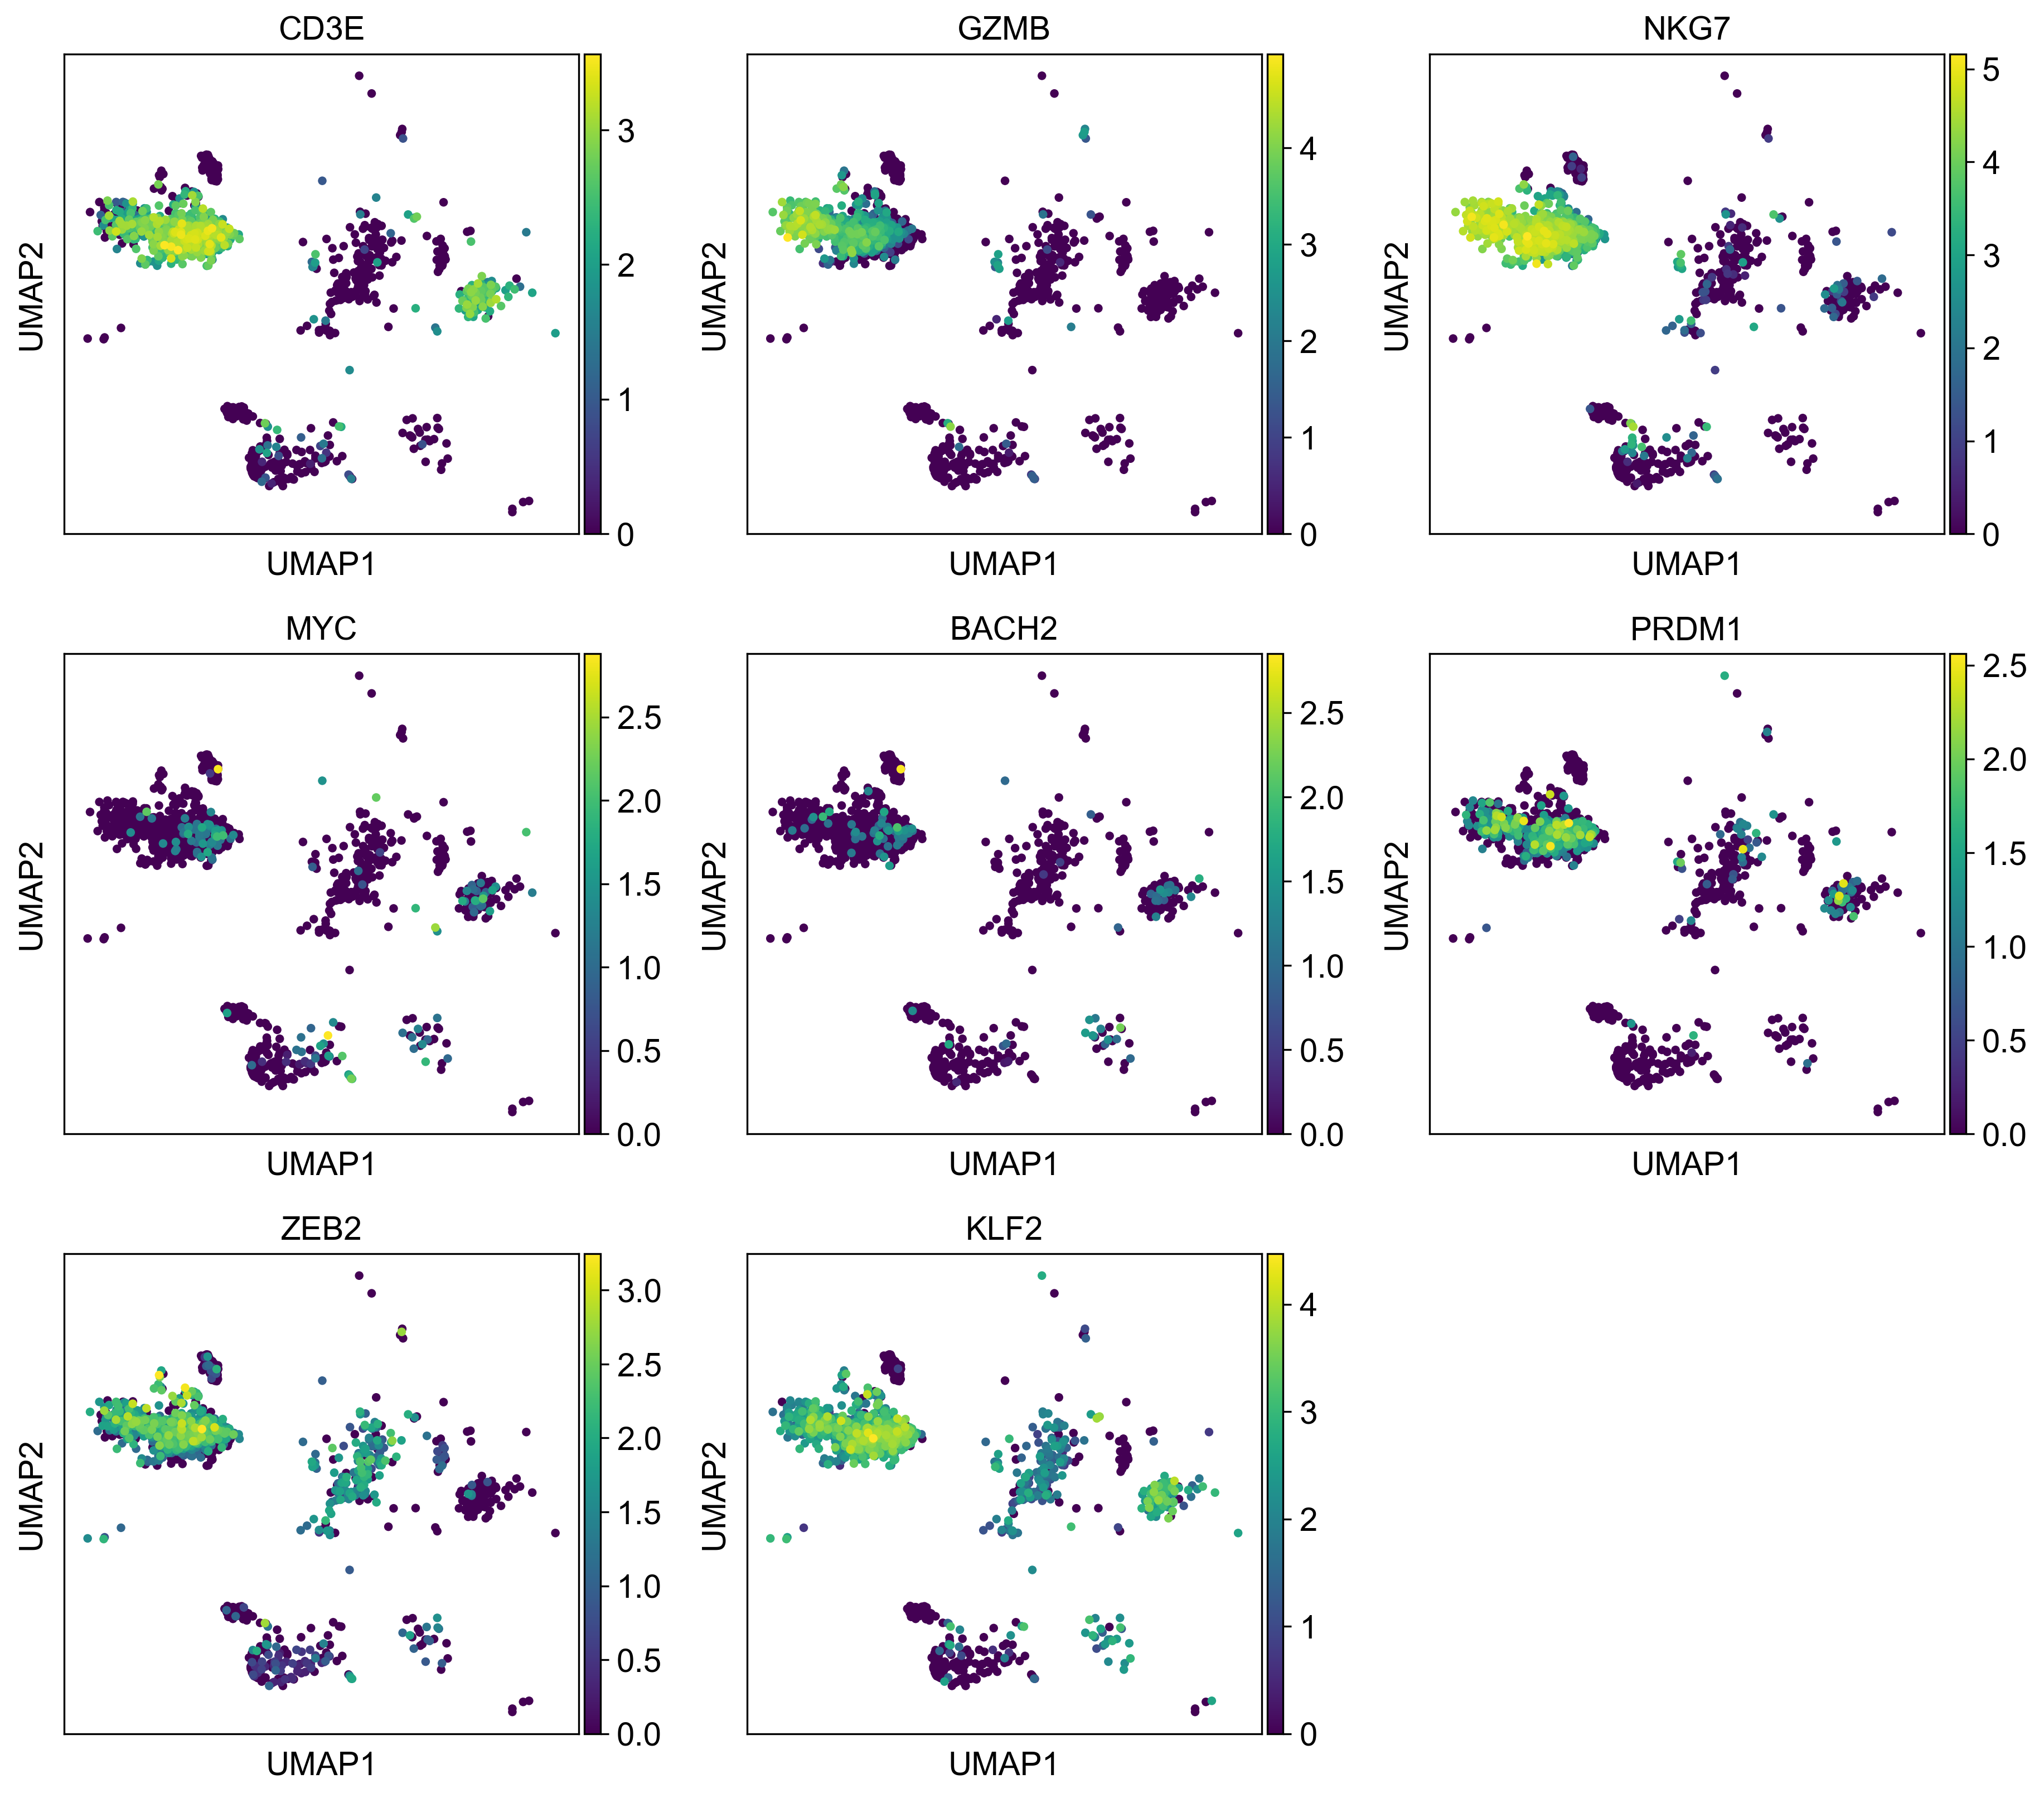

In [46]:
sc.pl.umap(adata, color = nk_mark, color_map = 'viridis', ncols = 3)

## Selecting only NK-cells

In [47]:
nkt= adata1[adata1.obs['cell_type'] == 'NKT' ]

In [48]:
nkt

View of AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr'
    obsp: 'connectivities', 'distances'

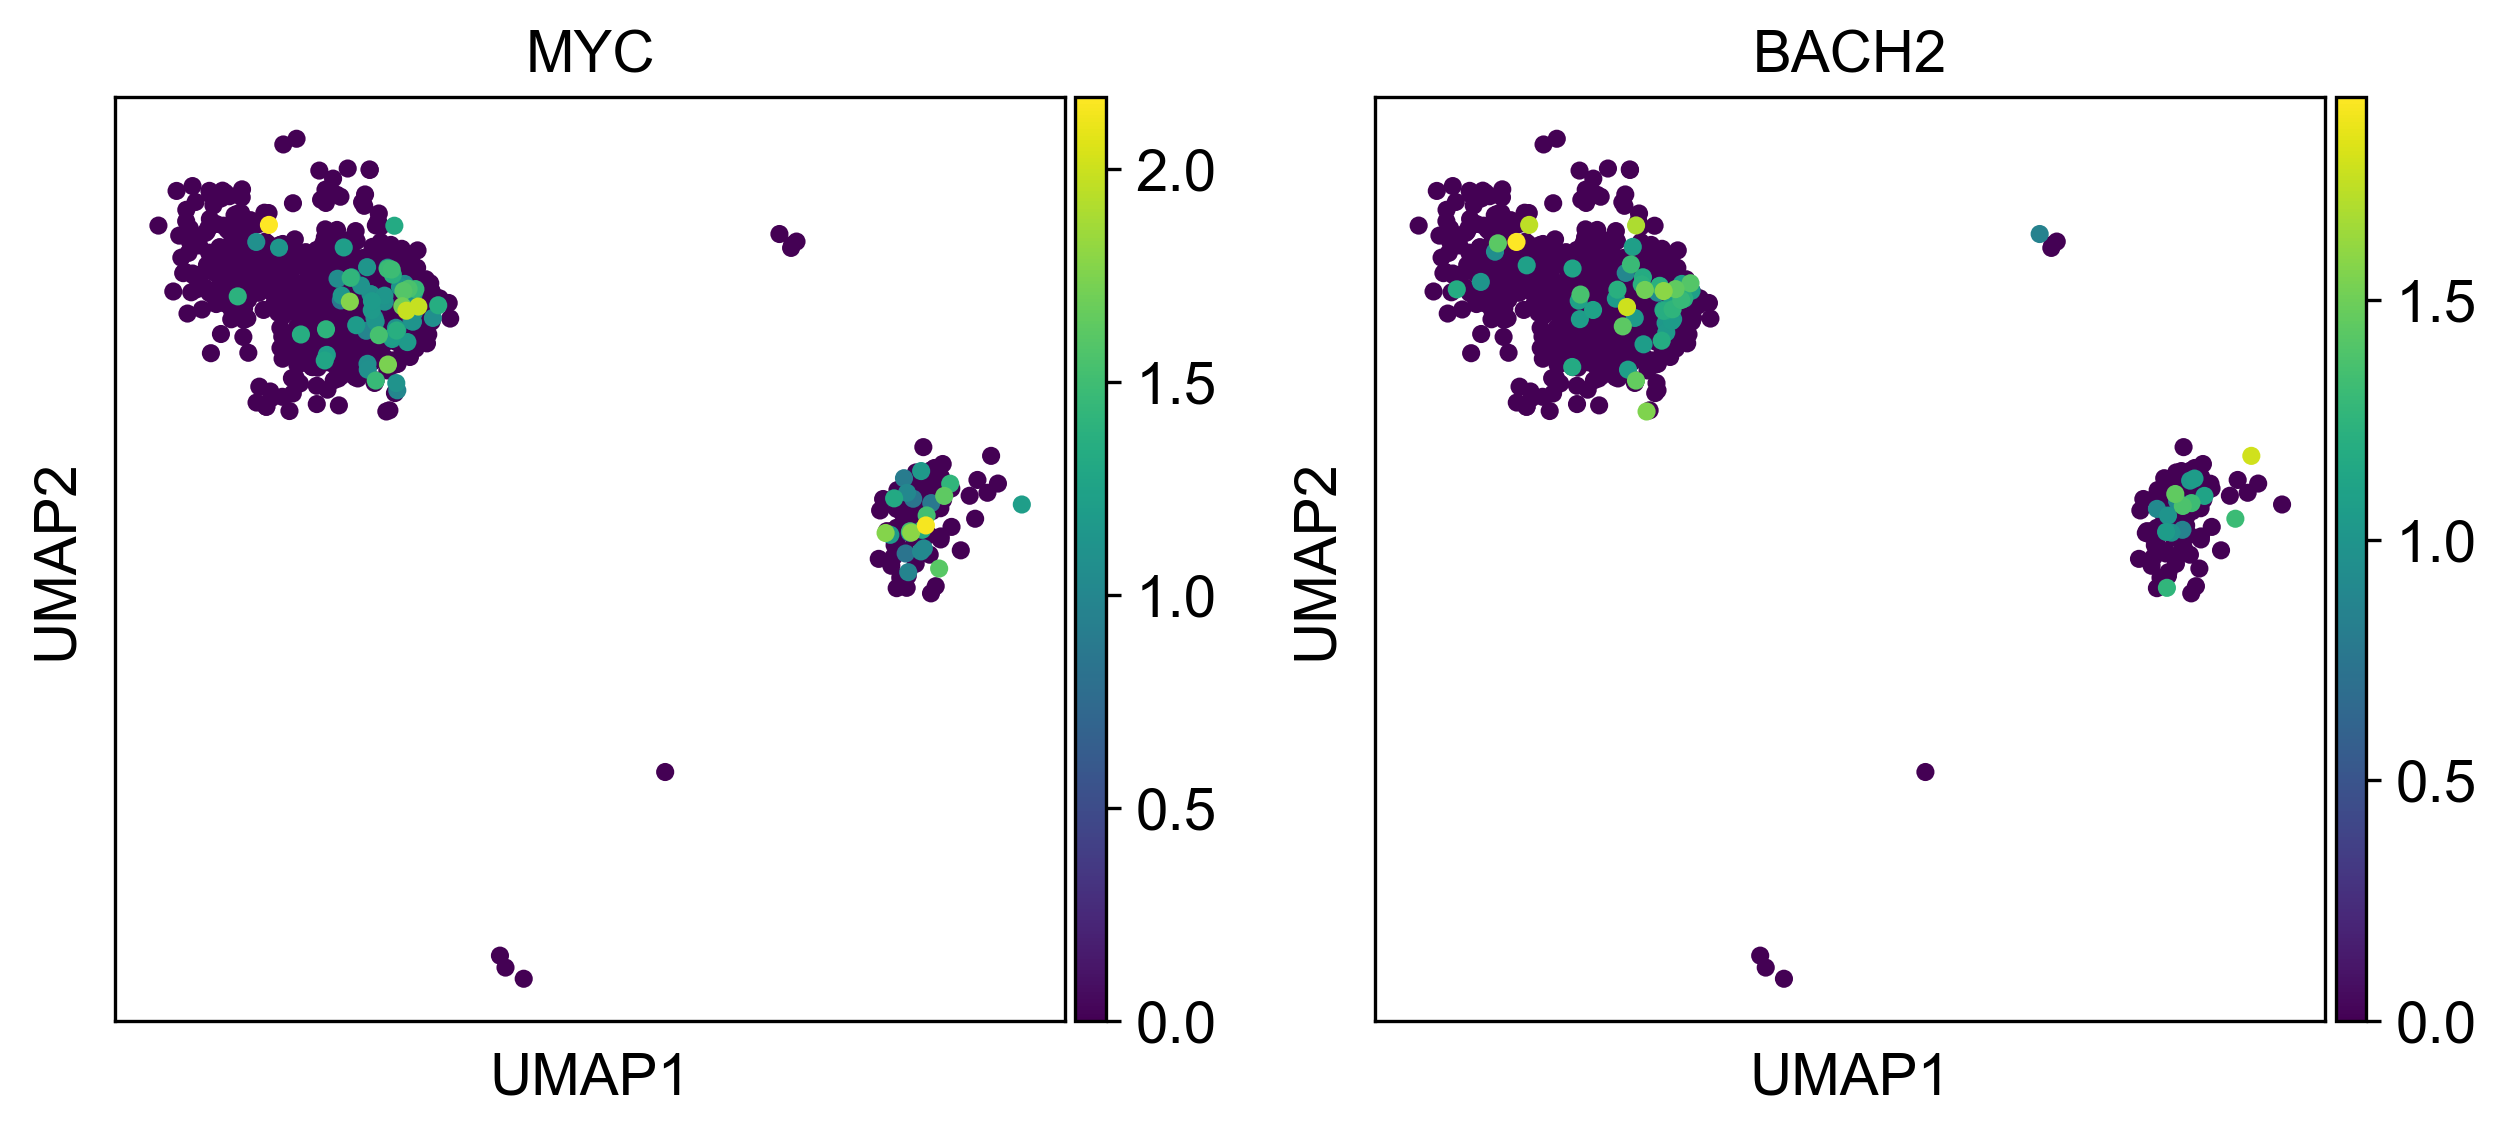

In [49]:
sc.pl.umap(nkt, color = nk_cd56_bright, color_map = 'viridis', ncols = 3)

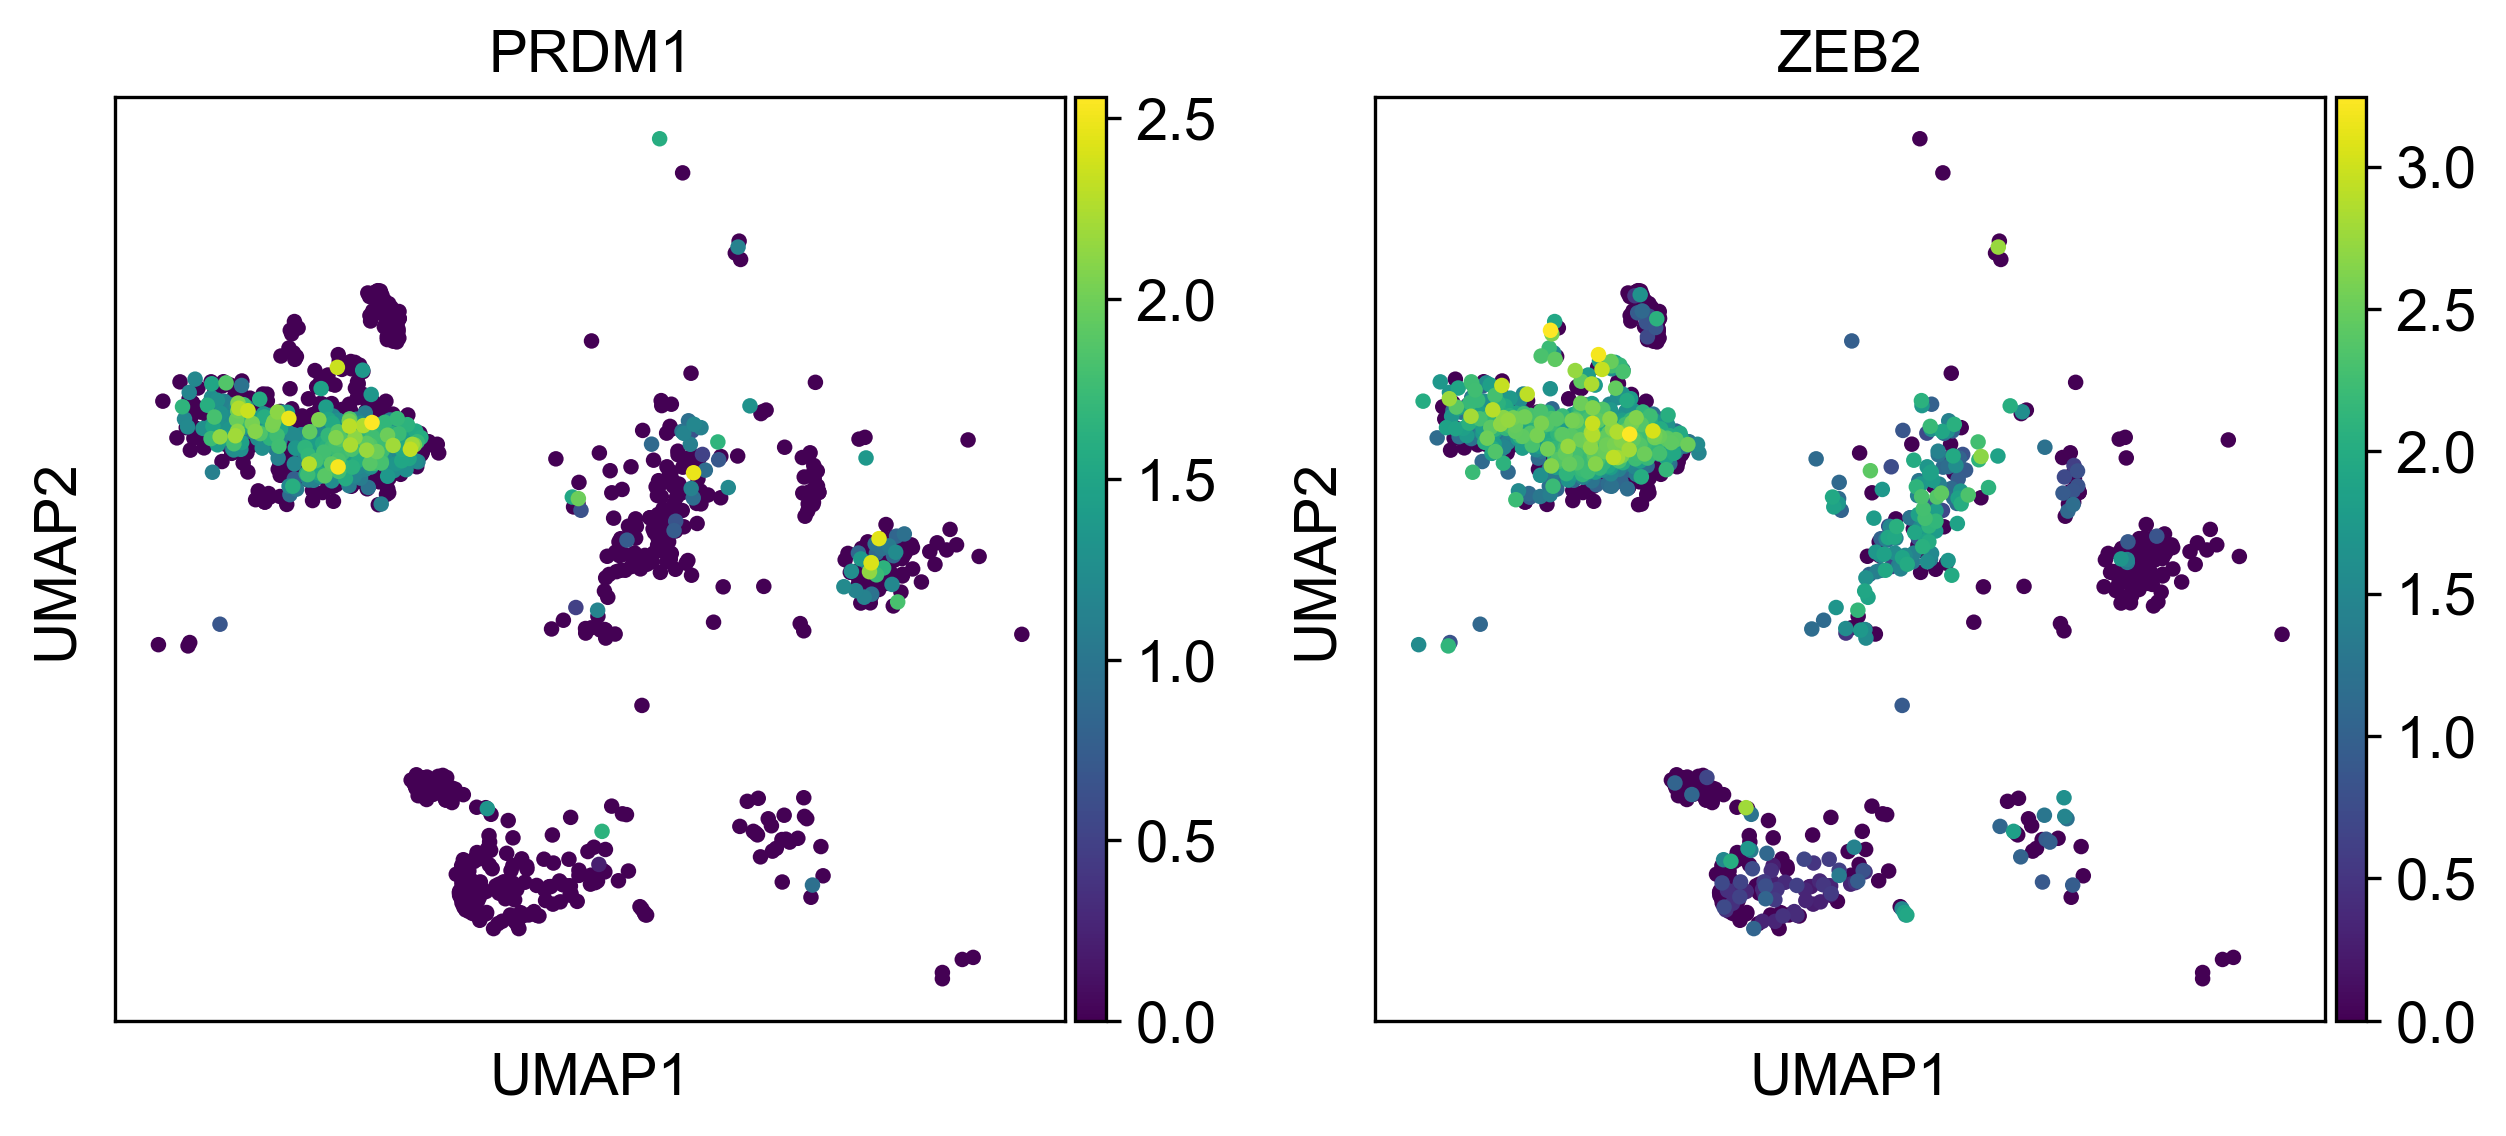

In [50]:
sc.pl.umap(adata1, color = nk_cd56_dim, color_map = 'viridis', ncols = 3)

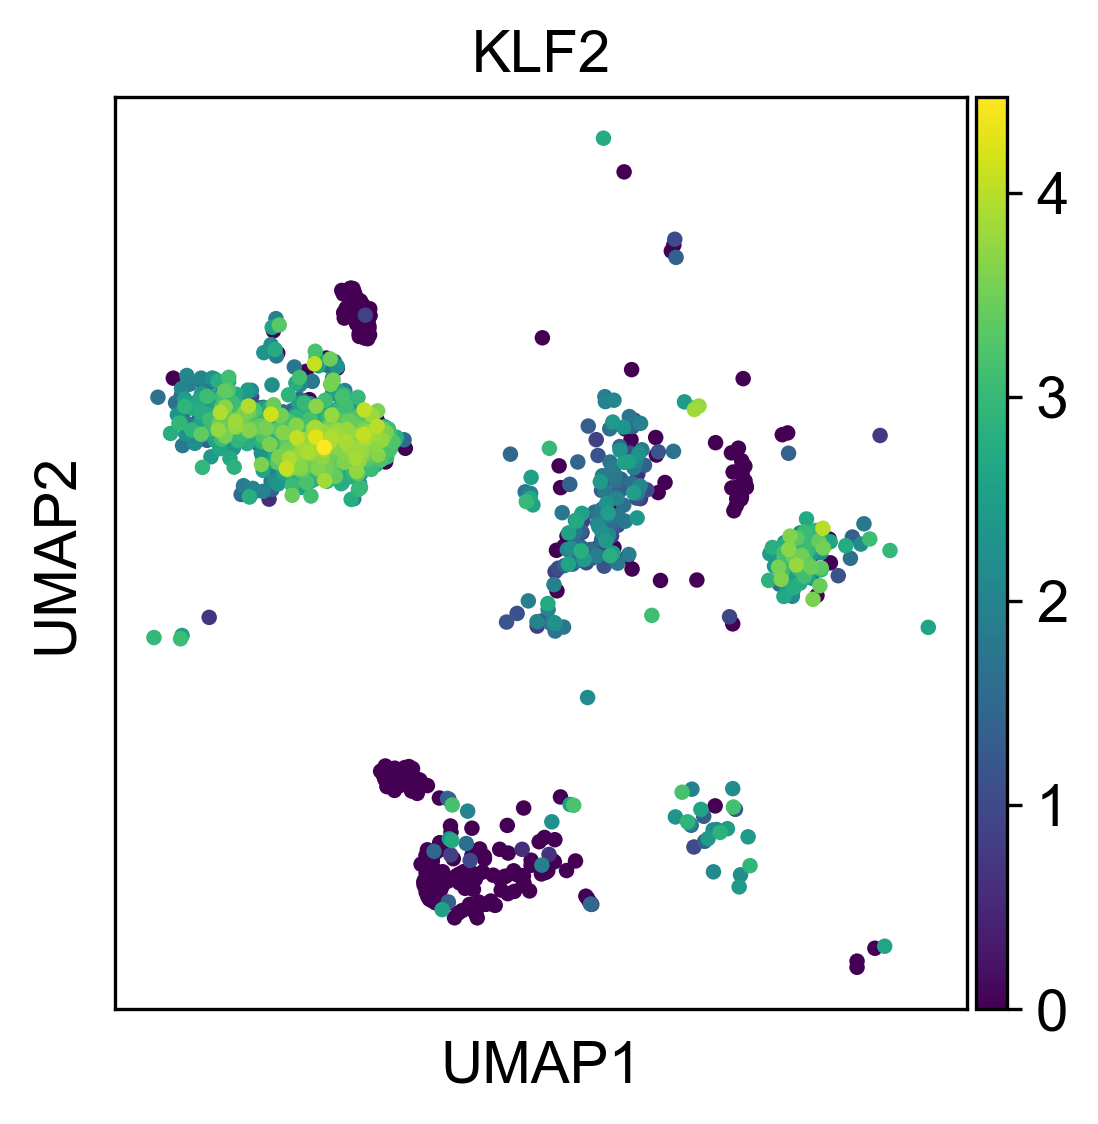

In [51]:
sc.pl.umap(adata1, color = nk_adaptive, color_map = 'viridis', ncols = 3)

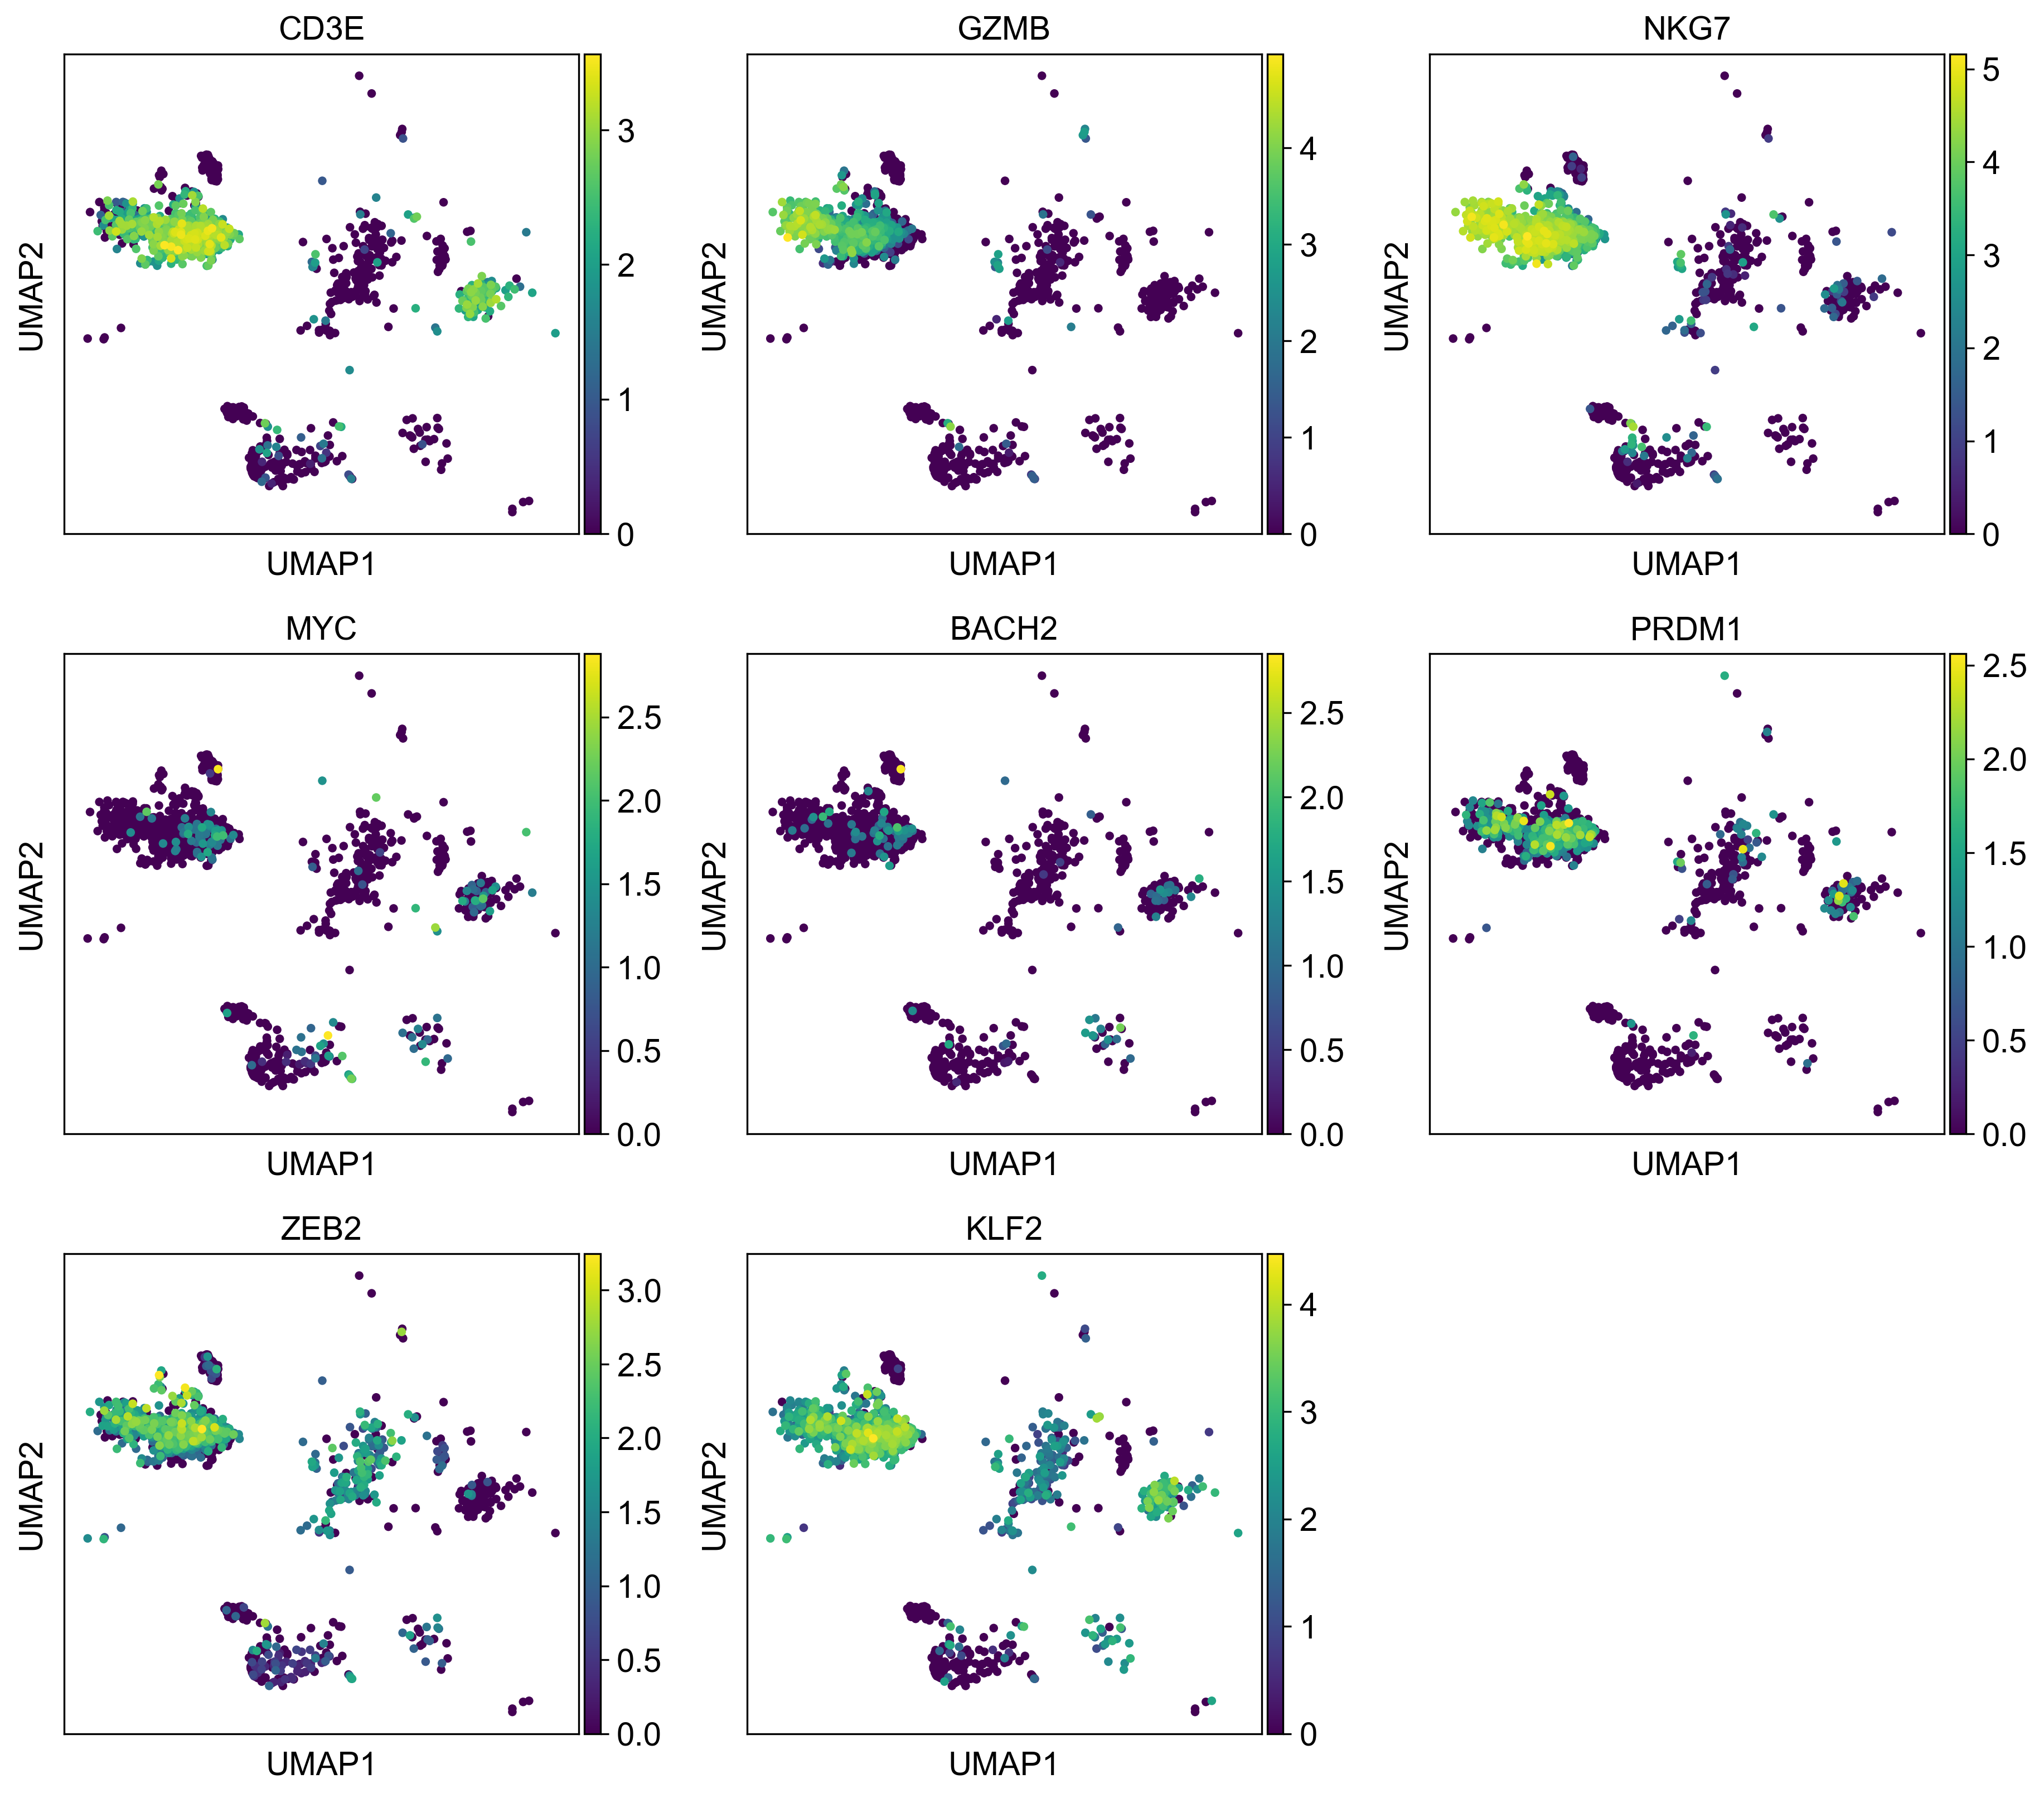

In [52]:
sc.pl.umap(adata, color = nk_mark, color_map = 'viridis', ncols = 3)